In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import algo
import json

2023-02-06 16:23:59.100458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [98]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", 
          "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94"]


In [6]:
path = 'fl/'
params = {}
results = {}
models = {}
for r,d,f in os.walk(path):
    for file in f:
        if "params.json" in file:
            with open(r+'/'+file) as json_file:
                params[r] = json.load(json_file)
        elif "results.csv" in file:
            results[r] = pd.read_csv(r+'/'+file)
            it = []
            client = []
            model_filenames = []
            if 'Unnamed: 0' in results[r].keys():
                for k in results[r]['Unnamed: 0']:
                    it.append(k[k.find('i')+1:k.find('_')])
                    client.append(k[k.find('_')+1:k.find('.npy')])
                    model_filenames.append(k+'.npy')
                results[r]['it'] = it
                results[r]['client'] = client
                results[r]['file_name'] = model_filenames
                results[r].pop('Unnamed: 0')
        elif '.npy' in file:
            if r not in models:
                models[r] = {}
            models[r][file] = np.load(r+'/'+file)



In [7]:
len(results.keys())

177

# Outout DP

In [92]:
list_to_check = []
for i in results:
    j = i+'_'
    if 'ncl2_' in j and 'eps1_' in j and 'outDPlocalTrue' in j:
        
        list_to_check.append(i[:i.find('_eps')])
list_to_check

In [101]:
to_plot = {}
for f in list_to_check:
    iteration = 4
    clients = {}
    for i in results:
        j = i+'_'
    #     if 'ncl2_' in j and 'eps1000_' in j and 'outDPlocalTrue' in j:
        if f in j:
            data = results[i]
    #         print(i)
    #         print(params[i]['outDP_local_epsilon'])
    #         print(data.loc[data['it']==iteration]['test_acc_out_DP'])
            if clients == {}:
                eps = []
                clients_list = list(data.loc[data['it']==iteration]['client'])
                for c in clients_list:
                    clients[c] = []
                    clients[c+'_attack_acc'] = []
            for c in clients_list:
                if c=='g':
                    clients[c].append(data.loc[data['it']==iteration].loc[data['client']==c]['test_acc'].item())
                else:
                    clients[c].append(data.loc[data['it']==iteration].loc[data['client']==c]['test_acc_out_DP'].item())
                clients[c+'_attack_acc'].append(data.loc[data['it']==iteration].loc[data['client']==c]['attack_acc_mean'].item())        
            eps.append(params[i]['outDP_local_epsilon'])
    clients['epsilon'] = eps
#     print(clients)
    df = pd.DataFrame.from_dict(clients)
    df = df.sort_values(by=['epsilon'])
    to_plot[f] = df

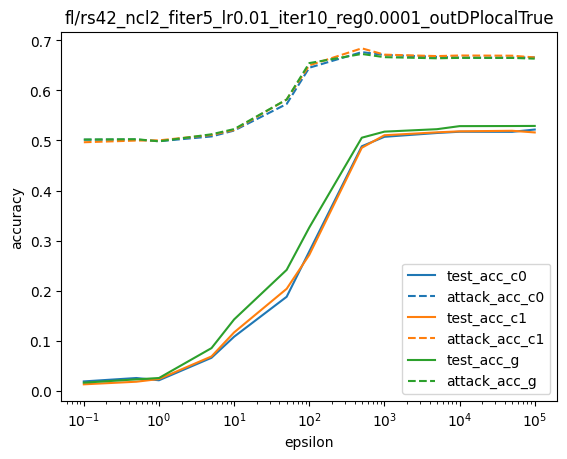

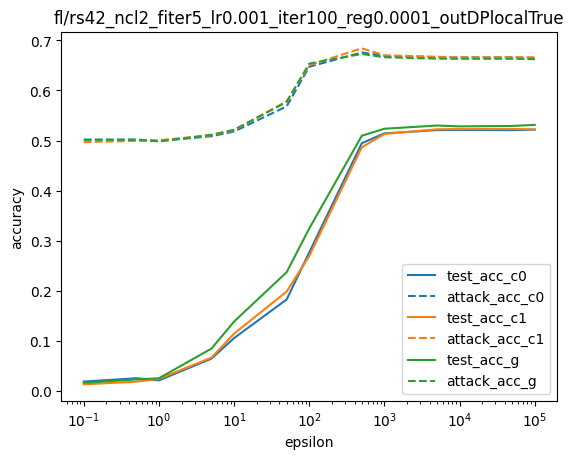

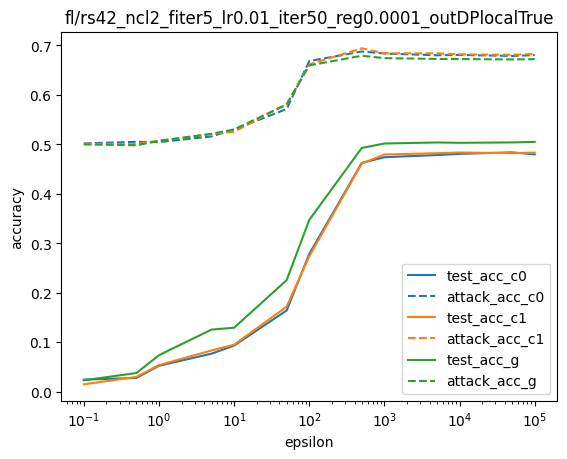

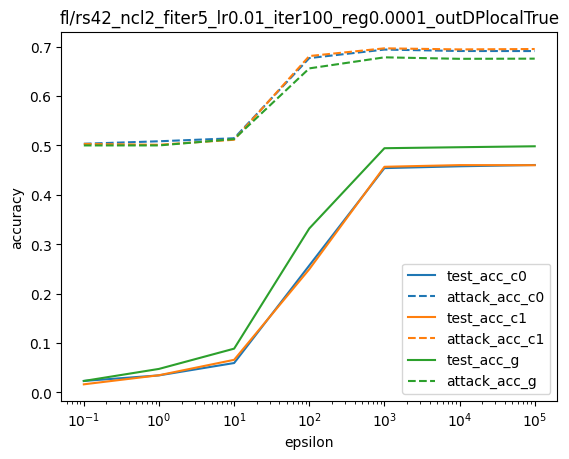

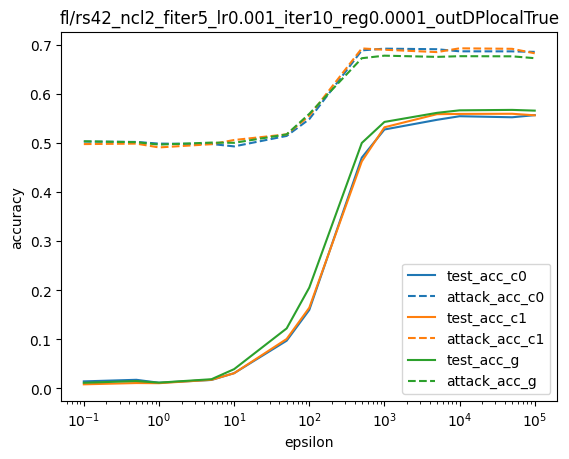

In [102]:
for f in to_plot:
    df = to_plot[f]
#     print(df)
    plt.figure()
    for i, c in enumerate(clients_list):
        plt.plot(df['epsilon'], df[c], label = 'test_acc_'+c, color=colors[i])
        plt.plot(df['epsilon'], df[c+'_attack_acc'], '--', label = 'attack_acc_'+c, color=colors[i])
    plt.legend()
    plt.xscale('log')
    plt.title(f)
    plt.xlabel('epsilon')
    plt.ylabel('accuracy')   
    # plt.savefig('figures/outputDP_train_test_lambda_epsilon1.png')

# DP SGD

In [108]:
list_to_check = []
for i in results:
    j = i+'_'
    if 'ncl2_' in j and 'sgdDPTrue' in j:
        print(i)
#         list_to_check.append(i[:i.find('_eps')])
list_to_check

# fl/rs42_ncl2_fiter5_lr0.001_iter500_reg1e-05_sgdDPTrue_eps1000000_L10_C2
# 0.5428
# fl/rs42_ncl2_fiter5_lr0.001_iter500_reg0.0001_sgdDPTrue_eps1000000_L10_C2
# 0.5404
# fl/rs42_ncl2_fiter5_lr0.01_iter200_reg1e-05_sgdDPTrue_eps1000000_L20_C2
# 0.5423
# fl/rs42_ncl2_fiter5_lr0.01_iter200_reg0.0001_sgdDPTrue_eps1000000_L20_C2
# 0.5406
# fl/rs42_ncl2_fiter5_lr0.01_iter100_reg1e-05_sgdDPTrue_eps1000000_L20_C2
# 0.5389
# fl/rs42_ncl2_fiter5_lr0.01_iter100_reg0.0001_sgdDPTrue_eps1000000_L20_C2
# 0.5378



fl/rs42_ncl2_fiter5_lr0.01_iter10_reg1e-05_sgdDPTrue_eps1000000_L10_C2
fl/rs42_ncl2_fiter5_lr0.01_iter1_reg1e-05_sgdDPTrue_eps1000000_L10_C2
fl/rs42_ncl2_fiter5_lr0.01_iter50_reg1e-05_sgdDPTrue_eps1000000_L20_C2
fl/rs42_ncl2_fiter5_lr0.001_iter500_reg1e-05_sgdDPTrue_eps1000000_L20_C2
fl/rs42_ncl2_fiter5_lr0.001_iter10_reg0.0001_sgdDPTrue_eps1000000_L10_C1
fl/rs42_ncl2_fiter5_lr0.01_iter10_reg1e-05_sgdDPTrue_eps1000000_L20_C2
fl/rs42_ncl2_fiter5_lr0.01_iter1_reg1e-05_sgdDPTrue_eps1000000_L20_C2
fl/rs42_ncl2_fiter5_lr0.01_iter50_reg1e-05_sgdDPTrue_eps1000000_L10_C2
fl/rs42_ncl2_fiter5_lr0.001_iter500_reg1e-05_sgdDPTrue_eps1000000_L10_C2
fl/rs42_ncl2_fiter5_lr0.01_iter50_reg0.0001_sgdDPTrue_eps1000000_L20_C2
fl/rs42_ncl2_fiter5_lr0.001_iter5_reg0.0001_sgdDPTrue_eps1000000_L10_C2
fl/rs42_ncl2_fiter5_lr0.001_iter300_reg1e-05_sgdDPTrue_eps1000000_L10_C2
fl/rs42_ncl2_fiter5_lr0.001_iter1_reg0.0001_sgdDPTrue_eps1000000_L20_C2
fl/rs42_ncl2_fiter5_lr0.01_iter50_reg0.0001_sgdDPTrue_eps1000000_L10

[]

In [129]:
lam_list = df['lambda_'].unique()


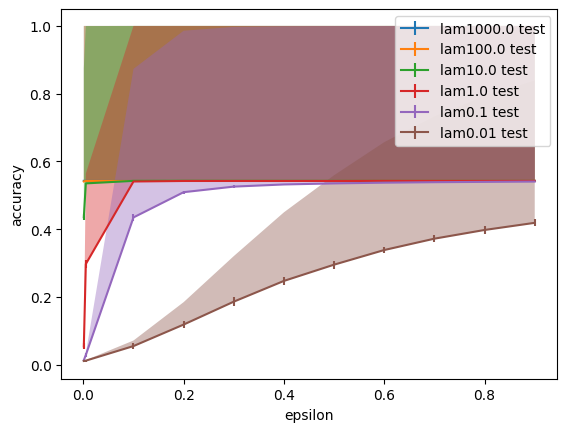

In [153]:

for lam in -np.sort(-lam_list) :
    lambda_res = mean_results.loc[mean_results['lambda_']==lam].loc[mean_results['epsilon_out']<1]
    
    if max(lambda_res['test_acc_mean'])>0.2:
#         print(lambda_res['epsilon_out'])
#         plt.errorbar(lambda_res['epsilon_out'], lambda_res['train_acc_mean'], lambda_res['train_acc_std'], label='lam'+str(lam)+' train')  
        plt.errorbar(lambda_res['epsilon_out'], lambda_res['test_acc_mean'], lambda_res['test_acc_std'], label='lam'+str(lam)+' test')
        plt.fill_between(lambda_res['epsilon_out'], lambda_res['test_acc_mean'], lambda_res['train_acc_mean'], alpha=0.4,) #label='lam'+str(lam))
        
plt.legend()
plt.xlabel('epsilon')
plt.ylabel('accuracy')   
plt.savefig('figures/outputDP_train_test_lambda_epsilon1.png')

In [96]:
a = df.loc[df['DP']==True].loc[df['test_acc']>0.3]
# plt.plot(a['test_acc'])
a

,n_classes,alpha,max_iter,lambda_,tolerance,DP,L,C,epsilon,delta,train_acc,test_acc
rs42_lr0.001_iter300_reg1e-05_DPTrue_eps100_L5_target_model_params.json,100,0.001,300,0.000010,0.00001,True,5,1,100.0,0.00001,0.5079,0.3474
rs42_lr0.001_iter300_reg1e-05_DPTrue_eps500_L3_target_model_params.json,100,0.001,300,0.000010,0.00001,True,3,1,500.0,0.00001,0.5384,0.3567
rs42_lr0.001_iter200_reg1e-05_DPTrue_eps500_L5_target_model_params.json,100,0.001,200,0.000010,0.00001,True,5,1,500.0,0.00001,0.4686,0.3348
rs42_lr0.001_iter200_reg1e-05_DPTrue_eps200_L5_target_model_params.json,100,0.001,200,0.000010,0.00001,True,5,1,200.0,0.00001,0.4528,0.3247
rs42_lr0.001_iter300_reg1e-05_DPTrue_eps200_L3_target_model_params.json,100,0.001,300,0.000010,0.00001,True,3,1,200.0,0.00001,0.5063,0.3301
rs42_lr0.001_iter200_reg1e-06_DPTrue_eps100_L5_target_model_params.json,100,0.001,200,0.000001,0.00001,True,5,1,100.0,0.00001,0.4332,0.3083
rs42_lr0.001_iter200_reg1e-06_DPTrue_eps500_L3_target_model_params.json,100,0.001,200,0.000001,0.00001,True,3,1,500.0,0.00001,0.4887,0.3268
rs42_lr0.001_iter200_reg1e-06_DPTrue_eps200_L3_target_model_params.json,100,0.001,200,0.000001,0.00001,True,3,1,200.0,0.00001,0.4561,0.3113
rs42_lr0.001_iter200_reg1e-06_DPTrue_eps500_L5_target_model_params.json,100,0.001,200,0.000001,0.00001,True,5,1,500.0,0.00001,0.4660,0.3264
rs42_lr0.001_iter200_reg1e-05_DPTrue_eps50_L5_target_model_params.json,100,0.001,200,0.000010,0.00001,True,5,1,50.0,0.00001,0.4213,0.3032


In [12]:

L1_res = mean_results.loc[mean_results['L']==1].loc[mean_results['DP']==True]
L10_res = mean_results.loc[mean_results['L']==10].loc[mean_results['DP']==True]
L100_res = mean_results.loc[mean_results['L']==100].loc[mean_results['DP']==True]
L1000_res = mean_results.loc[mean_results['L']==1000].loc[mean_results['DP']==True]

base_central = mean_results.loc[mean_results['DP']==False]

Text(0, 0.5, 'accuracy')

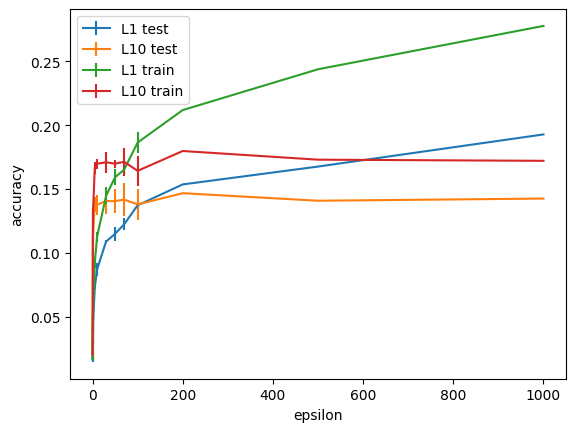

In [13]:
plt.errorbar(L1_res['epsilon'], L1_res['test_acc_mean'], L1_res['test_acc_std'], label='L1 test')
plt.errorbar(L10_res['epsilon'], L10_res['test_acc_mean'], L10_res['test_acc_std'], label='L10 test')
plt.errorbar(L1_res['epsilon'], L1_res['train_acc_mean'], L1_res['train_acc_std'], label='L1 train')
plt.errorbar(L10_res['epsilon'], L10_res['train_acc_mean'], L10_res['train_acc_std'], label='L10 train')
# plt.errorbar(L100_res['epsilon'], L100_res['test_acc_mean'], L100_res['test_acc_std'], label='L100 test')
# plt.errorbar(L100_res['epsilon'], L100_res['train_acc_mean'], L100_res['train_acc_std'], label='L100 train')
# plt.errorbar(L1000_res['epsilon'], L1000_res['test_acc_mean'], L1000_res['test_acc_std'], label='L1000 test')
# plt.errorbar(L1000_res['epsilon'], L1000_res['train_acc_mean'], L1000_res['train_acc_std'], label='L1000 train')

# plt.plot(L1_res['epsilon'], np.full(L1_res['epsilon'].shape[0], base_central['test_acc_mean']))
# plt.plot(L1_res['epsilon'], np.full(L1_res['epsilon'].shape[0], base_central['train_acc_mean']))
plt.legend()
plt.xlabel('epsilon')
plt.ylabel('accuracy')

In [14]:
max(df.loc[df["DP"]==True].test_acc)

0.2981

In [56]:
path = 'tm'
tms = {}
for r,d,f in os.walk(path):
    for file in f:
        tms[file] = np.load(path+'/'+file)
        

In [57]:
target_models = {}
for tm in tms:
    target_models[tm] = algo.LogisticRegression_DPSGD()
    target_models[tm].theta = tms[tm]

In [59]:
x_target_train = np.load('x_target_train.npy')
y_target_train = np.load('y_target_train.npy')
x_target_test = np.load('x_target_test.npy')
y_target_test = np.load('y_target_test.npy')

In [60]:
accuracy = {'train': {}, 'test': {}}
for model in target_models:
    accuracy['train'][model] = target_models[model].evaluate(x_target_train, y_target_train)
    accuracy['test'][model] = target_models[model].evaluate(x_target_test, y_target_test)

In [61]:
alpha          = 0.001
max_iter       = 100
lambda_        = 1e-5
tolerance      = 1e-5
DP             = True
L              = 1
epsilon        = 0.1


tm_path = f'lr{alpha}_iter{max_iter}_reg{lambda_}_DP{DP}_'
if DP:
    tm_path += f'eps{epsilon}_L{L}_'
tm_path        

'lr0.001_iter100_reg1e-05_DPTrue_eps0.1_L1_'

In [66]:
res = {}
plot_train = []
plot_test = []

for epsilon in np.arange(0.1,1.1,0.1):
    DP             = True
    L              = 1
#     epsilon        = 0.1
    tm_path = f'lr{alpha}_iter{max_iter}_reg{lambda_}_DP{DP}_'
    if DP:
        tm_path += f'eps{epsilon}_L{L}_'
        
    for model in target_models:
        if tm_path  in model:
            print(model)
            res[model] = (accuracy['train'][model], accuracy['test'][model])
            plot_train.append(accuracy['train'][model])
            plot_test.append(accuracy['test'][model])
plt.plot(plot_train)

lr0.001_iter100_reg1e-05_DPTrue_eps0.1_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.2_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.4_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.5_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.6_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.8_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.9_L1_target_model.npy


In [77]:
res = {}
plot_train = []
plot_test = []


eps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10]

for epsilon in eps:
    for model in target_models:
        if 'lr0.001_iter100_reg1e-05_DPTrue_' in model and '_L1_target_model.npy' in model and '_eps'+str(epsilon)+'_' in model:
            print(model)
            res[model] = (accuracy['train'][model], accuracy['test'][model])
            plot_train.append(accuracy['train'][model])
            plot_test.append(accuracy['test'][model])


lr0.001_iter100_reg1e-05_DPTrue_eps0.1_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.2_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.3_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.4_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.5_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.6_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.7_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.8_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.9_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps1_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps5_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps10_L1_target_model.npy


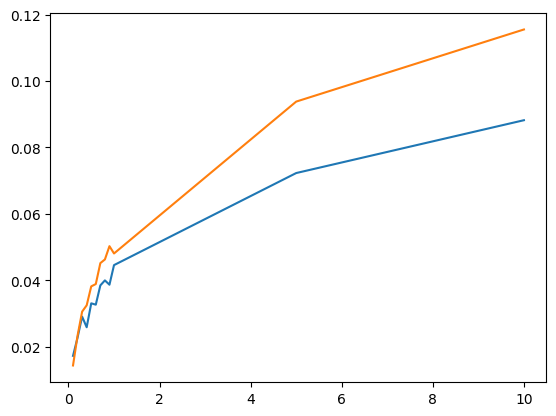

In [87]:
plt.plot(eps,plot_test)
plt.plot(eps,plot_train)
# plt.xscale('log')

In [ ]:
with open('test_model_param_save.json', 'r') as fp:
    data = json.load(fp)

# Output DP

In [166]:
path = 'tm'
tms_params = {}
tms = {}
for r,d,f in os.walk(path):
    for file in f:
        if 'DPFalse' in file and 'lr0.001_iter100_' in file:
            if '.npy' in file:
                tms[file.replace('.npy','')] = np.load(path+'/'+file)
            elif '.json' in file:
                with open(path+'/'+file) as json_file:
                    tms_params[file.replace('.json','')]= json.load(json_file)
            


In [173]:
df = pd.DataFrame.from_dict(tms_params, orient='index')
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'file_name'})
df

,file_name,n_classes,alpha,max_iter,lambda_,tolerance,DP,L,C,epsilon,delta,train_acc,test_acc
0,rs1_lr0.001_iter100_reg0.01_DPFalse_target_mod...,100,0.001,100,1.000000e-02,0.00001,False,10,1,0,0.00001,0.7816,0.5028
1,rs1_lr0.001_iter100_reg10_DPFalse_target_model...,100,0.001,100,1.000000e+01,0.00001,False,10,1,0,0.00001,0.0240,0.0238
2,rs1_lr0.001_iter100_reg1e-07_DPFalse_target_mo...,100,0.001,100,1.000000e-07,0.00001,False,10,1,0,0.00001,0.8691,0.5614
3,rs13_lr0.001_iter100_reg0.1_DPFalse_target_mod...,100,0.001,100,1.000000e-01,0.00001,False,10,1,0,0.00001,0.2128,0.1736
4,rs13_lr0.001_iter100_reg0.001_DPFalse_target_m...,100,0.001,100,1.000000e-03,0.00001,False,10,1,0,0.00001,0.8644,0.5601
5,rs24_lr0.001_iter100_reg1e-05_DPFalse_target_m...,100,0.001,100,1.000000e-05,0.00001,False,1,1,0,0.00001,0.9999,0.5521
6,rs1_lr0.001_iter100_reg1_DPFalse_target_model_...,100,0.001,100,1.000000e+00,0.00001,False,10,1,0,0.00001,0.0426,0.0411
7,rs1_lr0.001_iter100_reg1e-08_DPFalse_target_mo...,100,0.001,100,1.000000e-08,0.00001,False,10,1,0,0.00001,0.8657,0.5574
8,rs1_lr0.001_iter100_reg0.001_DPFalse_target_mo...,100,0.001,100,1.000000e-03,0.00001,False,10,1,0,0.00001,0.8612,0.5542
9,rs1_lr0.001_iter100_reg0.1_DPFalse_target_mode...,100,0.001,100,1.000000e-01,0.00001,False,10,1,0,0.00001,0.1984,0.1536


# FL output DP

In [341]:
path = 'fl'
ouput_dp_results = {}
for r,d,f in os.walk(path):
    for file in f:
        if 'results_outDP.json' in file:
            with open(r+'/'+file) as json_file:
                ouput_dp_results[r+'/'+file] = json.load(json_file)



In [358]:
# file = 'fl/rs42_ncl2_fiter5_lr0.01_iter10_reg0.0001_DPFalse/results_outDP.json'
#file = 'fl/rs42_ncl2_fiter5_lr0.01_iter100_reg0.0001_DPFalse/results_outDP.json'
file = 'fl/rs42_ncl2_fiter5_lr0.01_iter100_reg0.0001_DPFalse/fliter4_results_outDP.json'
data = ouput_dp_results[file]

In [359]:
epsilon = [float(i) for i in list(data.keys())]
clients = list(data[list(data.keys())[0]].keys())

In [360]:
plot_metrics = ['train_acc', 'test_acc', 'out_dp_train_acc', 'out_dp_test_acc', 
'attack_acc_mean',
 'attack_acc_std',
 'attack_pre_mean',
 'attack_pre_std',
 'attack_rec_mean',
 'attack_rec_std',
 'outdp_attack_acc_mean',
 'outdp_attack_acc_std',
 'outdp_attack_pre_mean',
 'outdp_attack_pre_std',
 'outdp_attack_rec_mean',
 'outdp_attack_rec_std']

In [361]:

eps_results = {}
for c in clients:
    eps_results[c] = {}
    for met in plot_metrics:
        eps_results[c][met] = []
    for i in list(data.keys()):
        if float(i) not in epsilon:
            continue
        for metric in data[i][c]:
            if metric == 'mi_attack':
                for at_met in data[i][c][metric]:
                    eps_results[c][at_met].append(data[i][c][metric][at_met])
            elif metric == 'out_dp_mi_attack':
                for at_met in data[i][c][metric]:
                    eps_results[c]['outdp_'+at_met].append(data[i][c][metric][at_met])
            elif metric in eps_results[c].keys():    
                eps_results[c][metric].append(data[i][c][metric])


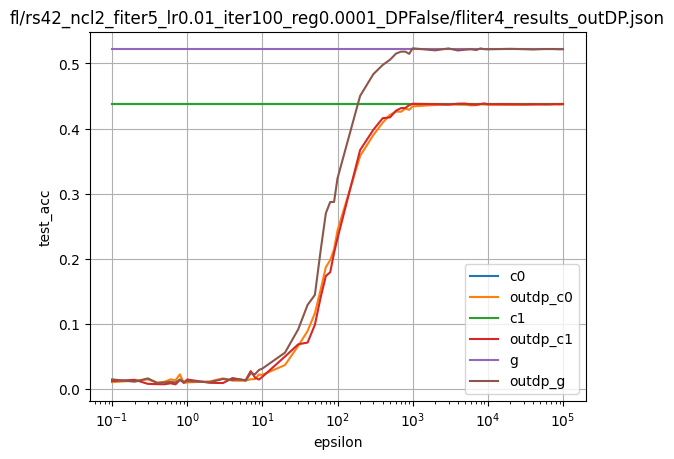

In [362]:
for c in clients:
    plt.plot(epsilon, eps_results[c]['test_acc'], label = c)
    plt.plot(epsilon, eps_results[c]['out_dp_test_acc'], label = 'outdp_'+c)

title = file.replace('results_outDP.json','').replace('/','_')
plt.legend()
plt.title(file)
plt.xlabel('epsilon')
plt.ylabel('test_acc')
plt.xscale('log')
plt.grid(True)
plt.savefig(f'figures/fl/output_dp/{title}_test_acc.png')

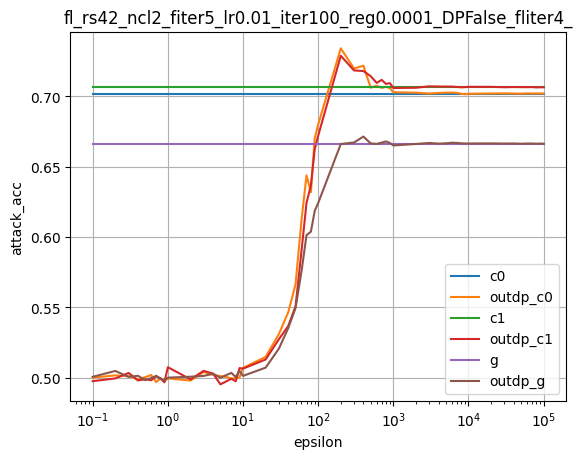

In [363]:
for c in clients:
    plt.plot(epsilon, eps_results[c]['attack_acc_mean'], label = c)
    plt.plot(epsilon, eps_results[c]['outdp_attack_acc_mean'], label = 'outdp_'+c)

title = file.replace('results_outDP.json','').replace('/','_')
plt.legend()
plt.title(title)
plt.xlabel('epsilon')
plt.ylabel('attack_acc')
plt.xscale('log')
plt.grid(True)
plt.savefig(f'figures/fl/output_dp/{title}_attack_acc.png')

In [356]:
# for i,c in enumerate(clients):
#     plt.plot(epsilon, eps_results[c]['out_dp_test_acc'], label = 'test_acc_'+c, color=colors[i] )
#     plt.plot(epsilon, eps_results[c]['out_dp_train_acc'], '--', label = 'train_acc_'+c, color=colors[i] )
#     plt.errorbar(epsilon, eps_results[c]['outdp_attack_acc_mean'], eps_results[c]['outdp_attack_acc_std'], label = 'attack_acc_'+c, color=colors[i])

# title = file.replace('results_outDP.json','').replace('/','_')
# plt.legend()
# plt.title(title)
# plt.xlabel('epsilon')
# # plt.ylabel('attack_acc')
# plt.xscale('log')
# plt.grid(True)
# plt.savefig(f'figures/fl/output_dp/{title}_tran_test_attack_acc_all_nodes.png')

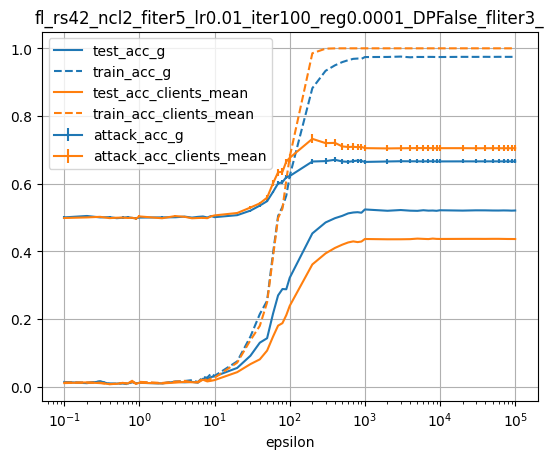

In [357]:
#global
plt.plot(epsilon, eps_results['g']['out_dp_test_acc'], label = 'test_acc_g', color=colors[0] )
plt.plot(epsilon, eps_results['g']['out_dp_train_acc'], '--', label = 'train_acc_g', color=colors[0] )
plt.errorbar(epsilon, eps_results['g']['outdp_attack_acc_mean'], eps_results['g']['outdp_attack_acc_std'], label = 'attack_acc_g', color=colors[0])
#mean clients
clients_mean = clients_mean_count(eps_results)
plt.plot(epsilon, clients_mean['out_dp_test_acc'], label = 'test_acc_clients_mean', color=colors[1] )
plt.plot(epsilon, clients_mean['out_dp_train_acc'], '--', label = 'train_acc_clients_mean', color=colors[1] )
plt.errorbar(epsilon, clients_mean['outdp_attack_acc_mean'], clients_mean['outdp_attack_acc_std'], label = 'attack_acc_clients_mean', color=colors[1])


title = file.replace('results_outDP.json','').replace('/','_')
plt.legend()
plt.title(title)
plt.xlabel('epsilon')
# plt.ylabel('attack_acc')
plt.xscale('log')
plt.grid(True)
plt.savefig(f'figures/fl/output_dp/{title}_tran_test_attack_acc_clients_mean.png')

In [231]:
eps_results[c].keys()

dict_keys(['train_acc', 'test_acc', 'out_dp_train_acc', 'out_dp_test_acc', 'attack_acc_mean', 'attack_acc_std', 'attack_pre_mean', 'attack_pre_std', 'attack_rec_mean', 'attack_rec_std', 'outdp_attack_acc_mean', 'outdp_attack_acc_std', 'outdp_attack_pre_mean', 'outdp_attack_pre_std', 'outdp_attack_rec_mean', 'outdp_attack_rec_std'])

In [232]:
# https://www.heavy.ai/blog/12-color-palettes-for-telling-better-stories-with-your-data
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", 
          "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94"]


In [218]:
def clients_mean_count(eps_results):
    clients_data = {}
    for c in eps_results:
        if c !='g':
            clients_data[c] = pd.DataFrame.from_dict(eps_results[c])
    clients_mean = {}
    for met in eps_results['c0'].keys():
        col = {}
        for c in clients_data:
            col[c] = clients_data[c][met]
        new_df = pd.DataFrame.from_dict(col) 
        clients_mean[met] = new_df.mean(axis=1)
        
    return clients_mean

In [220]:
clients_mean['test_acc']

0     0.46395
1     0.46395
2     0.46395
3     0.46395
4     0.46395
5     0.46395
6     0.46395
7     0.46395
8     0.46395
9     0.46395
10    0.46395
11    0.46395
12    0.46395
13    0.46395
14    0.46395
15    0.46395
16    0.46395
17    0.46395
18    0.46395
19    0.46395
20    0.46395
21    0.46395
22    0.46395
23    0.46395
24    0.46395
25    0.46395
26    0.46395
27    0.46395
28    0.46395
29    0.46395
30    0.46395
31    0.46395
32    0.46395
33    0.46395
34    0.46395
35    0.46395
36    0.46395
37    0.46395
38    0.46395
39    0.46395
40    0.46395
41    0.46395
42    0.46395
43    0.46395
44    0.46395
45    0.46395
46    0.46395
47    0.46395
48    0.46395
49    0.46395
50    0.46395
51    0.46395
52    0.46395
53    0.46395
54    0.46395
dtype: float64